In [ ]:
#Data proprocessing
#Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('spm.tsv', sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
#check number of ham and spam
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
#Balancing the data
#select the ham data
ham = df[df['label'] =='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [9]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [10]:
#select the spam data
spam = df[df['label'] =='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [11]:
#check the shape of data
ham.shape, spam.shape

((4825, 4), (747, 4))

In [12]:
spam.shape[0]

747

In [13]:
ham = ham.sample(spam.shape[0])

In [14]:
ham.shape

(747, 4)

In [15]:
#check the shape of data
ham.shape, spam.shape

((747, 4), (747, 4))

In [16]:
df = pd.concat([ham, spam], ignore_index=True)

In [17]:
df.shape

(1494, 4)

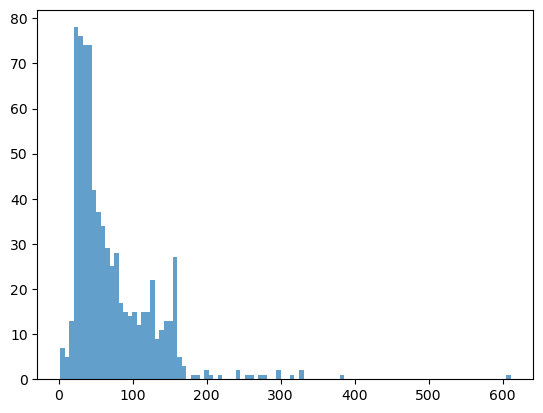

In [18]:
#Data visualization
#plot histogram of length for ham messages
plt.hist(df[df['label'] == 'ham']['length'],bins=100, alpha=0.7)
plt.show()

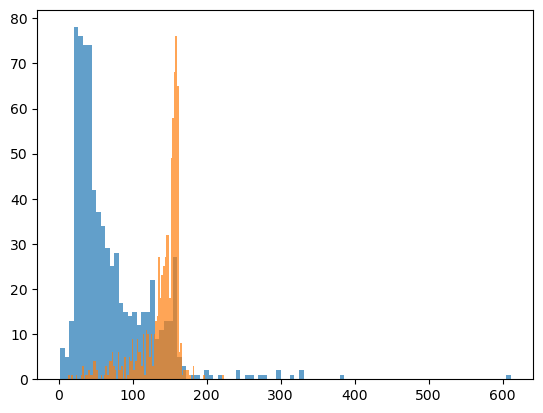

In [19]:
#plot histogram of length for ham and spam both
plt.hist(df[df['label'] == 'ham']['length'],bins=100, alpha=0.7)
plt.hist(df[df['label'] == 'spam']['length'],bins=100, alpha=0.7)
plt.show()

In [ ]:
#IT LOOK LKIKE THERE'S-A SMALL RANGE OF VALUES WHERE A MASSAGE IS MORE LIKELY  TO BE SPAM THAN HAM

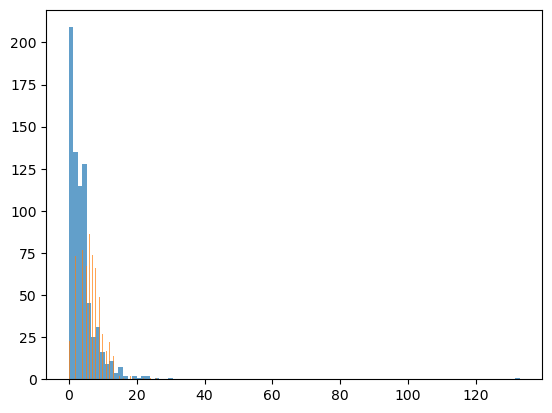

In [20]:
# PLOT HISTOGRAM OF PUNCT FOR HAM AND SPAM BOTH
plt.hist(df[df['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(df[df['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

In [ ]:
#next
#split data into train &  test sets

In [21]:
x_train,x_test,y_train,y_test = train_test_split(df['message'],df['label'],test_size=0.3,random_state=0,shuffle=True)

In [22]:
x_train

1438      You have 1 new message. Please call 08715205273
431     O. Well uv causes mutations. Sunscreen is like...
194     Was doing my test earlier. I appreciate you. W...
240     Jesus christ bitch I'm trying to give you drug...
1309    Had your mobile 11 months or more? U R entitle...
                              ...                        
763     Your free ringtone is waiting to be collected....
835     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216    Dorothy@kiefer.com (Bank of Granite issues Str...
559                 Yo, you at jp and hungry like a mofo?
684                            K.k:)advance happy pongal.
Name: message, Length: 1045, dtype: object

In [23]:
y_train

1438    spam
431      ham
194      ham
240      ham
1309    spam
        ... 
763     spam
835     spam
1216    spam
559      ham
684      ham
Name: label, Length: 1045, dtype: object

In [ ]:
#building the model(random forest)

In [24]:
from sklearn.pipeline import Pipeline
#there will be lot repeated processes for training and testing the dataset separtely,
#to avoid that we are using pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
#we are importing TfidVectorizer to utilize bag of words model in sklearn
from sklearn.ensemble import RandomForestClassifier

In [25]:
classifier=Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=100))])

In [26]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [28]:
#predicting the results(random forest)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [29]:
y_pred =classifier.predict(x_test)

In [30]:
#confusion metrix
confusion_matrix(y_test,y_pred)

array([[225,   2],
       [ 21, 201]], dtype=int64)

In [ ]:
#ham and spam
#spam and ham

In [31]:
#classification report
print(classification_report(y_test,y_pred))
#we are geeting 95% accuracy

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [32]:
accuracy_score(y_test,y_pred)

0.9487750556792873

In [33]:
#predict a real message
classifier.predict(['Hello,You are learning Natural Language Processing'])

array(['ham'], dtype=object)

In [34]:
classifier.predict(['Hope you are doing good and learning new thing'])

array(['ham'], dtype=object)

In [35]:
classifier.predict(['congratulations,you won a lottery ticket worth $1 million ! to claim call on 446677'])

array(['spam'], dtype=object)

In [36]:
# Building the model (SVM)

In [37]:
from sklearn.svm import SVC

In [38]:
classifier =Pipeline([('tfidf',TfidfVectorizer()),('classifier',SVC(C=100,gamma='auto'))])

In [39]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [45]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [46]:
y_pred =classifier.predict(x_test)

In [47]:
confusion_matrix(y_test,y_pred)

array([[226,   1],
       [ 25, 197]], dtype=int64)

In [48]:
#classification report
print(classification_report(y_test,y_pred))
#we are geeting 95% accuracy

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       227
        spam       0.99      0.89      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [49]:
accuracy_score(y_pred,y_test)

0.9420935412026726

In [50]:
classifier.predict(['Hope you are doing good and learning new thing'])

array(['ham'], dtype=object)